<h1>
<center>CFRM 421/521</center>
</h1>

<h1>
<center>Yevgen Revtsov</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Tuesday, May 27, 2025, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, kernel_initializer="glorot_normal")
])
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 20406.3281 - val_loss: 56.4079
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 13.7450 - val_loss: 26.3230
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 4.2473 - val_loss: 13.1006
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 2.5797 - val_loss: 6.1220
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.8588 - val_loss: 3.2989
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.4930 - val_loss: 2.5257
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.3062 - val_loss: 2.4276
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.2024 - val_loss: 2.6477
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.1383 - val_loss: 3.1632
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1060 - val_loss: 3.6771
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.0989 - val_loss: 3.4939
Epoch 12/30
413/413 ━━

In [48]:
model_relu = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="relu", kernel_initializer="he_normal")
])
model_relu.compile(loss='mse', optimizer='nadam')
history_relu = model_relu.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 5.5688 - val_loss: 5.7567
Epoch 12/30
413/413 ━━━━━━━━━━

In [49]:
pd.DataFrame(history.history).iloc[-1, :]

loss        6.662468
val_loss    2.515069
Name: 29, dtype: float64

In [50]:
pd.DataFrame(history_relu.history).iloc[-1, :]

loss        5.597989
val_loss    5.756706
Name: 29, dtype: float64

The validation loss for ReLU is 5.75 while for the identity function is 2.51. The identity function activation produces a 2x smaller validation loss. However, using the ReLU activation function results in much closer validation loss to the training loss. The identity activation is better sine the validation loss is much lower.

## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

In [6]:
def build_model(hp: kt.HyperParameters):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=100)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
        sampling="log")
    l2 = hp.Float("l2", min_value=1e-4, max_value=100, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "nadam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(
            learning_rate=learning_rate, 
            clipnorm=1.0
        )
    else:
        optimizer = tf.keras.optimizers.Nadam(
            learning_rate=learning_rate
        )
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(
            n_neurons, 
            activation="relu", 
            kernel_regularizer=tf.keras.regularizers.l2(l2)))
    model.add(tf.keras.layers.Dense(1, kernel_initializer="glorot_normal"))
    model.compile(loss="mse", optimizer=optimizer,)
    return model

In [7]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_loss", max_trials=20, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train[:5000], y_train[:5000], epochs=20,
    validation_data=(X_valid, y_valid))

Trial 20 Complete [00h 00m 02s]
val_loss: 47.08333969116211

Best val_loss So Far: 0.7223991751670837
Total elapsed time: 00h 00m 46s


##### best model and params are below

In [51]:
top_model = random_search_tuner.get_best_models(num_models=3)
best_model = top_model[0]

top_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top_params[0].values

/Users/erevtsov/dev/cfrm/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 27 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Users/erevtsov/dev/cfrm/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'n_hidden': 5,
 'n_neurons': 62,
 'learning_rate': 0.006718710759425462,
 'l2': 0.0003483686981793893,
 'optimizer': 'nadam'}

## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

In [9]:
history_best = best_model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - loss: 19.5976 - val_loss: 0.8240
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.7437 - val_loss: 0.7497
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.6942 - val_loss: 0.6400
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.6485 - val_loss: 0.6205
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.6490 - val_loss: 0.6008
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.6496 - val_loss: 0.7716
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 1.1948 - val_loss: 0.6451
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.6555 - val_loss: 0.6094
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.7499 - val_loss: 1.4235
Epoch 10/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1.3470 - val_loss: 1.4212
Epoch 11/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.3166 - val_loss: 0.7169
Epoch 12/200
413/4

<Axes: >

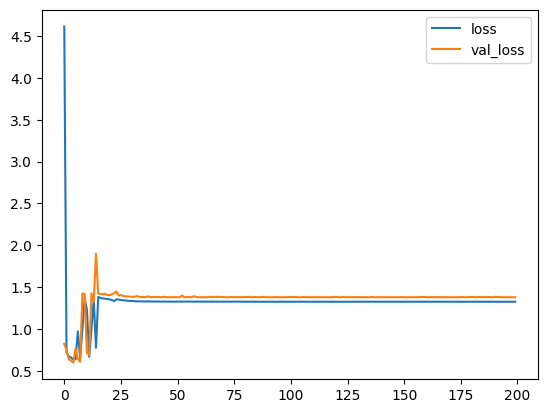

In [10]:
pd.DataFrame(history_best.history).plot()

The training and validation loss values are very close together, so the model is not overfitting.

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [118]:
df = pd.read_csv("datasets/bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)
df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()

/var/folders/_r/fqfrhk7s0wv6d3lj1cgbhcnc0000gn/T/ipykernel_39975/3076060008.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [119]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [120]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

In [121]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Proportion of successes in the training data:
proportion_successes = np.mean(y_train)
print(proportion_successes)


0.11168075907717029



Justification for (i): He initialization is a good choice because it is a variance-preserving initialization method, which is better than Xavier initialization for neurons with a large number of inputs. Swish activation is used because it is a more recent and better performing alternative to ReLU.

Justification for (ii): The output layer has 1 neuron with sigmoid activation because the task is a binary classification task.

Justification for (iii): The loss is binary cross-entropy because it is the most common and suitable loss function for binary classification tasks. AUC is a suitable metric because it is a measure of the model's ability to distinguish between positive and negative classes.

Proportion of success is ~0.11


## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

In [122]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)


In [123]:

# I was having issues with the given exponential decay function
# using this instead, from the documentation it's doing the same thing.
exp_decay = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20,
    decay_rate=0.1,
    staircase=False,
    name='ExponentialDecay'
)

optimizer = tf.keras.optimizers.SGD(
    momentum=0.9,
    nesterov=True,
    learning_rate=exp_decay)

reset_session()
dnn_model.compile(
    loss='binary_crossentropy',
    metrics=['AUC'],
    optimizer=optimizer)

history = dnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - AUC: 0.5075 - loss: 0.4028 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - AUC: 0.5101 - loss: 0.3838 - val_AUC: 0.4830 - val_loss: 0.3919
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

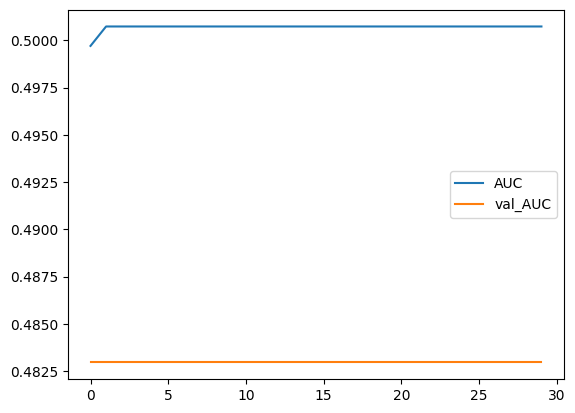

In [124]:
res = pd.DataFrame(history.history)
res[['AUC', 'val_AUC']].plot()

The training and vlaue AUC are quite tight, I don't see much overfitting. Re-running the model a few times yields similar results.

## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

In [125]:
# Model with Batch Normalization
reset_session()

optimizer = tf.keras.optimizers.SGD(
    momentum=0.9,
    nesterov=True,
    learning_rate=exp_decay)

dnn_model_bn = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


dnn_model_bn.compile(loss='binary_crossentropy', metrics=['AUC'], optimizer=optimizer)
history_bn = dnn_model_bn.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - AUC: 0.7234 - loss: 0.5040 - val_AUC: 0.7239 - val_loss: 0.4815
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - AUC: 0.7475 - loss: 0.4650 - val_AUC: 0.7238 - val_loss: 0.4820
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

In [126]:
# Model with Early Stopping
reset_session()
early_stopping = EarlyStopping(monitor='val_AUC', patience=10, mode='max', restore_best_weights=True)
dnn_model_es = tf.keras.models.clone_model(dnn_model)
history_es = dnn_model_es.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping])


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - AUC: 0.5901 - loss: 0.3673 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - AUC: 0.6139 - loss: 0.3492 - val_AUC: 0.6088 - val_loss: 0.3478
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

In [127]:
# Model with L2 Regularization
reset_session()

optimizer = tf.keras.optimizers.SGD(
    momentum=0.9,
    nesterov=True,
    learning_rate=exp_decay)

dnn_model_l2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002)),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002)),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002)),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
dnn_model_l2.compile(loss='binary_crossentropy', metrics=['AUC'], optimizer=optimizer)
history_l2 = dnn_model_l2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - AUC: 0.4904 - loss: 0.5578 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - AUC: 0.5077 - loss: 0.5386 - val_AUC: 0.4989 - val_loss: 0.5381
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

In [128]:

# Model with Dropout
reset_session()

optimizer = tf.keras.optimizers.SGD(
    momentum=0.9,
    nesterov=True,
    learning_rate=exp_decay)
dnn_model_dropout = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
dnn_model_dropout.compile(loss='binary_crossentropy', metrics=['AUC'], optimizer=optimizer)
history_dropout = dnn_model_dropout.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - AUC: 0.5483 - loss: 0.4007 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - AUC: 0.5628 - loss: 0.3802 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - AUC: 0.5688 - loss: 0.3793 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - AUC: 0.5603 - loss: 0.3801 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - AUC: 0.5638 - loss: 0.3799 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - AUC: 0.5615 - loss: 0.3809 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - AUC: 0.5652 - loss: 0.3800 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - AUC: 0.5603 - loss: 0.3807 - val_AUC: 0.5519 - val_loss: 0.3839
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

In [129]:
# Model with L2 Regularization and Early Stopping
reset_session()
dnn_model_l2_es = tf.keras.models.clone_model(dnn_model_l2)
history_l2_es = dnn_model_l2_es.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping])


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - AUC: 0.5322 - loss: 0.5418 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - AUC: 0.5499 - loss: 0.5214 - val_AUC: 0.5319 - val_loss: 0.5254
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

In [130]:
# Model with Batch Normalization and Dropout
reset_session()

optimizer = tf.keras.optimizers.SGD(
    momentum=0.9,
    nesterov=True,
    learning_rate=exp_decay)

dnn_model_bn_dropout = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer='he_normal'),
    Dropout(0.02),
    BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
dnn_model_bn_dropout.compile(loss='binary_crossentropy', metrics=['AUC'], optimizer=optimizer)
history_bn_dropout = dnn_model_bn_dropout.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# You can now compare validation AUCs for model (b) and the models above


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - AUC: 0.7218 - loss: 0.5076 - val_AUC: 0.7633 - val_loss: 0.4825
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - AUC: 0.7445 - loss: 0.4763 - val_AUC: 0.7626 - val_loss: 0.4857
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - AUC: 0.7444 - loss: 0.4745 - val_AUC: 0.7631 - val_loss: 0.4830
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - AUC: 0.7474 - loss: 0.4740 - val_AUC: 0.7629 - val_loss: 0.4841
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - AUC: 0.7488 - loss: 0.4744 - val_AUC: 0.7622 - val_loss: 0.4818
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - AUC: 0.7452 - loss: 0.4743 - val_AUC: 0.7623 - val_loss: 0.4824
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - AUC: 0.7482 - loss: 0.4741 - val_AUC: 0.7627 - val_loss: 0.4830
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - AUC: 0.7446 - loss: 0.4756 - val_AUC: 0.7628 - val_loss: 0.4800
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

In [131]:
res_all = pd.Series({
    'SQ': history.history['val_AUC'][-1],
    'Batch': history_bn.history['val_AUC'][-1],
    'Early Stop': history_es.history['val_AUC'][-1],
    'Dropout': history_dropout.history['val_AUC'][-1],
    'L2': history_l2.history['val_AUC'][-1],
    'L2 + Early Stop': history_l2_es.history['val_AUC'][-1],
    'Batch + Dropout': history_bn_dropout.history['val_AUC'][-1],
})
res_all

SQ                 0.482959
Batch              0.723819
Early Stop         0.608782
Dropout            0.551862
L2                 0.498869
L2 + Early Stop    0.531873
Batch + Dropout    0.762798
dtype: float64

The model in (b) is only bested by L2, and L2 benefits from early stopping, showing that it converges earlier than the 30 epochs.

## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

<Axes: title={'center': 'Dropout'}>

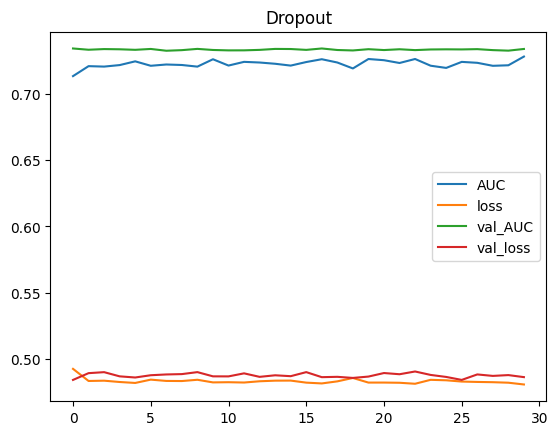

In [89]:
pd.DataFrame(history_bn_dropout.history).plot(title='Dropout')

The training and validation AUC for for the model with Dropout are pretty tight, just like they were for the original model in (b).

## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

In [26]:
from sklearn import metrics

y_pred_test_l2_es = history_l2_es.model.predict(X_test)
y_pred_test_l2_es_class = np.where(y_pred_test_l2_es > 0.5, 1, 0)
test_auc_l2_es = metrics.roc_auc_score(y_test, y_pred_test_l2_es)
test_confusion_l2_es = metrics.confusion_matrix(y_test, y_pred_test_l2_es_class)

print(f"Test AUC: {test_auc_l2_es:.4f}")
print(f"Test Confusion Matrix:\n{test_confusion_l2_es}")

# interpret results
print(f"Test Accuracy: {(test_confusion_l2_es[0][0] + test_confusion_l2_es[1][1]) / np.sum(test_confusion_l2_es):.4f}")
print(f"Test Precision: {test_confusion_l2_es[1][1] / (test_confusion_l2_es[1][1] + test_confusion_l2_es[0][1]):.4f}")
print(f"Test Recall: {test_confusion_l2_es[1][1] / (test_confusion_l2_es[1][1] + test_confusion_l2_es[1][0]):.4f}")
print(f"Test F1: {metrics.f1_score(y_test, y_pred_test_l2_es_class):.4f}")

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
Test AUC: 0.5589
Test Confusion Matrix:
[[7166    0]
 [1003    0]]
Test Accuracy: 0.8772
Test Precision: nan
Test Recall: 0.0000
Test F1: 0.0000


/var/folders/_r/fqfrhk7s0wv6d3lj1cgbhcnc0000gn/T/ipykernel_39975/2014987866.py:13: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Test Precision: {test_confusion_l2_es[1][1] / (test_confusion_l2_es[1][1] + test_confusion_l2_es[0][1]):.4f}")


# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [255]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

In [256]:
def create_dataset(data, input_len, target_len):
    data_pivot = pd.DataFrame()
    x_cols = []
    for i in range(input_len):
        data_pivot[f'X_{i}d'] = data['DEXJPUS'].shift(i)
        x_cols.append(f'X_{i}d')

    y_cols = []
    for i in range(1, target_len+1):
        data_pivot[f'y_{i}d'] = data['DEXJPUS'].shift(-i)
        y_cols.append(f'y_{i}d')
    data_pivot = data_pivot.ffill()
    data_pivot = data_pivot.iloc[input_len+1:]
    return data_pivot

def split_data(data, input_len, target_len):
    x_cols = [f'X_{i}d' for i in range(input_len)]
    y_cols = [f'y_{i}d' for i in range(1, target_len+1)]
    X_train = data.loc[:'2009-12-31', x_cols].values
    y_train = data.loc[:'2009-12-31', y_cols].squeeze().values
    X_valid = data.loc['2010-01-01':'2015-12-31', x_cols].values
    y_valid = data.loc['2010-01-01':'2015-12-31', y_cols].squeeze().values
    X_test = data.loc['2016-01-01':, x_cols].values
    y_test = data.loc['2016-01-01':, y_cols].squeeze().values
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [257]:
# forward-filling the data (missing prices are on holidays so we can assume that the price is the same as T-1)
# converting the prices to returns to create an easier dataset for the model to work with
data_clean = data.ffill().pct_change().dropna().mul(100)

data_pivot = create_dataset(data_clean, input_len=10, target_len=1)
X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(data_pivot, input_len=10, target_len=1)

## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

### NOTE: 

- Since I am using return time series and not prices, the formula for direction is slightly different. I just need to determine the sign of the value and compare to test set. 
- Trying to predict the price is not a fruitful task. You can just take the mean of the trailing 10-day price and it will appear to be a "good" fit.

In [258]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

rf_reg = RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean squared error: {mse:.8f}")

accuracy = accuracy_score(
    y_true=(np.sign(y_test) ==  np.sign(X_test[:, 0])), y_pred=(np.sign(y_pred_rf)  == np.sign(X_test[:, 0]))
)
print(f"Accuracy for the movement direction: {accuracy:.4f}")


Mean squared error: 0.32407133
Accuracy for the movement direction: 0.5411


## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

Epoch 1/100


/Users/erevtsov/dev/cfrm/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4952 - val_loss: 0.3615
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4700 - val_loss: 0.3550
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4648 - val_loss: 0.3524
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4615 - val_loss: 0.3513
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4592 - val_loss: 0.3508
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4575 - val_loss: 0.3506
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4561 - val_loss: 0.3505
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4550 - val_loss: 0.3507
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4540 - val_loss: 0.3509
Epoch 10/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4532 - val_loss: 0.3511
Epoch 11/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4524 - val_loss: 0.3514
Epoch 12/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

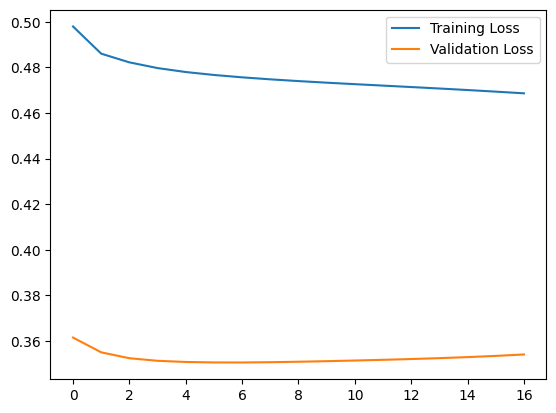

In [260]:
# (c)
reset_session()

model_ts = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])

model_ts.compile(loss='mse', optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001))
history_ts = model_ts.fit(
    X_train[..., np.newaxis],
    y_train,
    epochs=100,
    validation_data=(X_valid[..., np.newaxis], y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

y_pred_rnn = model_ts.predict(X_test[..., np.newaxis])

plt.plot(history_ts.history['loss'], label='Training Loss')
plt.plot(history_ts.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


<Axes: >

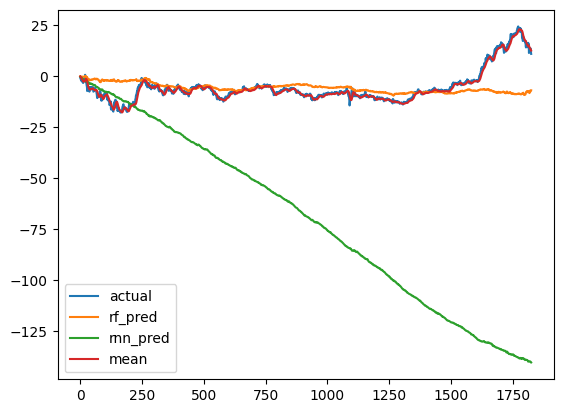

In [269]:
pd.DataFrame({'actual': y_test, 'rf_pred': y_pred_rf, 'rnn_pred': y_pred_rnn.ravel(), 'mean': X_test.mean(axis=1)}).cumsum().plot()

The prediction is pretty terrible. the validation loss doesn't seem too bad, but that's because we are predicting small values (even after mulpiplying by 100 to convert to %). You can see on the cumulative plot that you are better off using a simple mean of the trailing returns than using random forest or RNN prediction.

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

In [270]:
data_pivot_3d = create_dataset(data_clean, input_len=10, target_len=3)
X_train_3d, y_train_3d, X_valid_3d, y_valid_3d, X_test_3d, y_test_3d = split_data(data_pivot_3d, input_len=10, target_len=3)

Epoch 1/100


/Users/erevtsov/dev/cfrm/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6307 - val_loss: 0.3527
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4925 - val_loss: 0.3496
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4893 - val_loss: 0.3480
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4874 - val_loss: 0.3471
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4860 - val_loss: 0.3465
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4850 - val_loss: 0.3462
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4842 - val_loss: 0.3461
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4836 - val_loss: 0.3460
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4831 - val_loss: 0.3460
Epoch 10/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4826 - val_loss: 0.3461
Epoch 11/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4822 - val_loss: 0.3462
Epoch 12/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

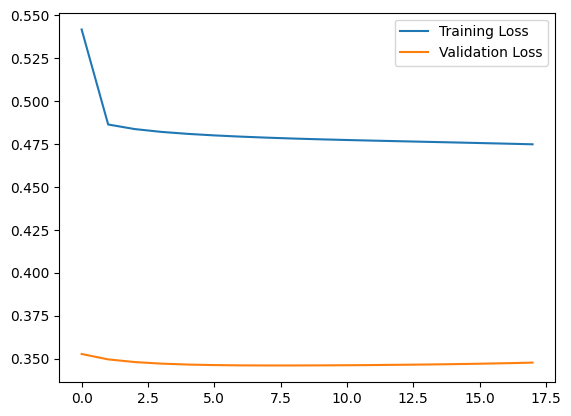

In [271]:
# (c)
reset_session()

model_3d = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(3)
])

model_3d.compile(loss='mse', optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001))
history_3d = model_3d.fit(
    X_train_3d[..., np.newaxis],
    y_train_3d[..., np.newaxis],
    epochs=100,
    validation_data=(X_valid_3d[..., np.newaxis], y_valid_3d[..., np.newaxis]),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

plt.plot(history_3d.history['loss'], label='Training Loss')
plt.plot(history_3d.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [272]:
y_pred_3d = model_3d.predict(X_test_3d[..., np.newaxis])

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [273]:
accuracy = accuracy_score(
    y_true=(np.sign(y_test_3d[:, 0]) ==  np.sign(X_test_3d[:, 0])), y_pred=(np.sign(y_pred_3d[:, 0])  == np.sign(X_test_3d[:, 0]))
)
print(f"Accuracy for the movement direction day 1: {accuracy:.4f}")

accuracy = accuracy_score(
    y_true=(np.sign(y_test_3d[:, 1]) ==  np.sign(X_test_3d[:, 1])), y_pred=(np.sign(y_pred_3d[:, 1])  == np.sign(X_test_3d[:, 1]))
)
print(f"Accuracy for the movement direction day 2: {accuracy:.4f}")

accuracy = accuracy_score(
    y_true=(np.sign(y_test_3d[:, 2]) ==  np.sign(X_test_3d[:, 2])), y_pred=(np.sign(y_pred_3d[:, 2])  == np.sign(X_test_3d[:, 2]))
)
print(f"Accuracy for the movement direction day 3: {accuracy:.4f}")


Accuracy for the movement direction day 1: 0.5071
Accuracy for the movement direction day 2: 0.5279
Accuracy for the movement direction day 3: 0.5011


Similar to the one-observation case, the validation loss plot looks OK. but the accuracy for movement direction is more or less a toss-up. 